In [90]:
import numpy as np
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt
from tensorflow import keras

In [25]:
# Read the data
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

# Reshape de train and test data
X_train = np.reshape(xtrain,(209, 64*64*3))/255
X_test = np.reshape(xtest,(50, 64*64*3))/255

y_train = np.array(train_label)
y_test = np.array(test_label)

In [37]:
input_size = X_train[0].shape[0]


In [107]:
# Creación del modelo
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(units=40, input_dim=input_size, activation='relu'))
  model.add(keras.layers.Dense(units=30, activation="relu"))
  model.add(keras.layers.Dense(units=20, activation="linear"))
  model.add(keras.layers.Dense(units=1, activation = activation))
  # opt = keras.optimizers.Adam(learning_rate=0.01)
  opt = keras.optimizers.SGD(lr=0.005)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model


Train: 1.000, Test: 0.780


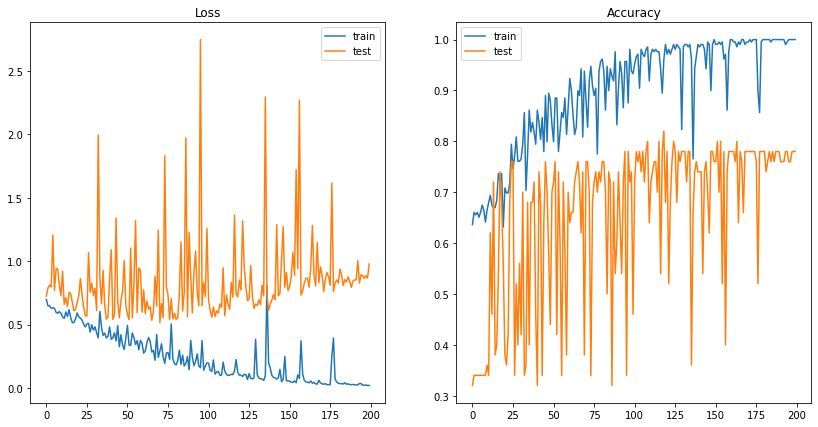

In [108]:
# binary cross entropy:

keras.backend.clear_session()

model = build_model2()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Con el modelo de red neuronal construido en la celda anterior se obtiene un accuracy del 100% para los datos de entrenamiento y del 78% para los de testeo.

In [132]:
# Creación del modelo
def build_model3(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(units=40, input_dim=input_size, activation='relu'))
  model.add(keras.layers.Dense(units=20, input_dim=input_size, activation='relu'))
  model.add(keras.layers.Dense(units=10, activation="sigmoid"))
  model.add(keras.layers.Dense(units=1, activation = activation))
  # opt = keras.optimizers.Adam(learning_rate=0.01)
  opt = keras.optimizers.SGD(learning_rate=0.005)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model


Train: 0.967, Test: 0.740


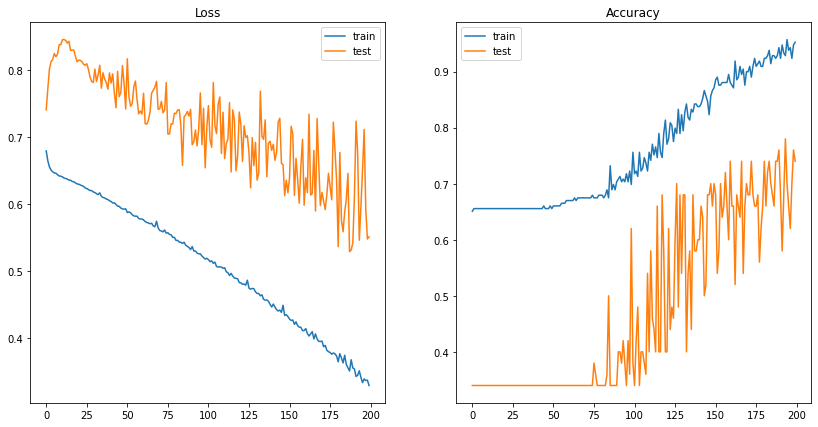

In [133]:
# binary cross entropy:

keras.backend.clear_session()

model = build_model3()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()